In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv = datasets.fetch_olivetti_faces()

In [6]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [10]:
oliv["data"].shape
oliv["images"].shape

(400, 64, 64)

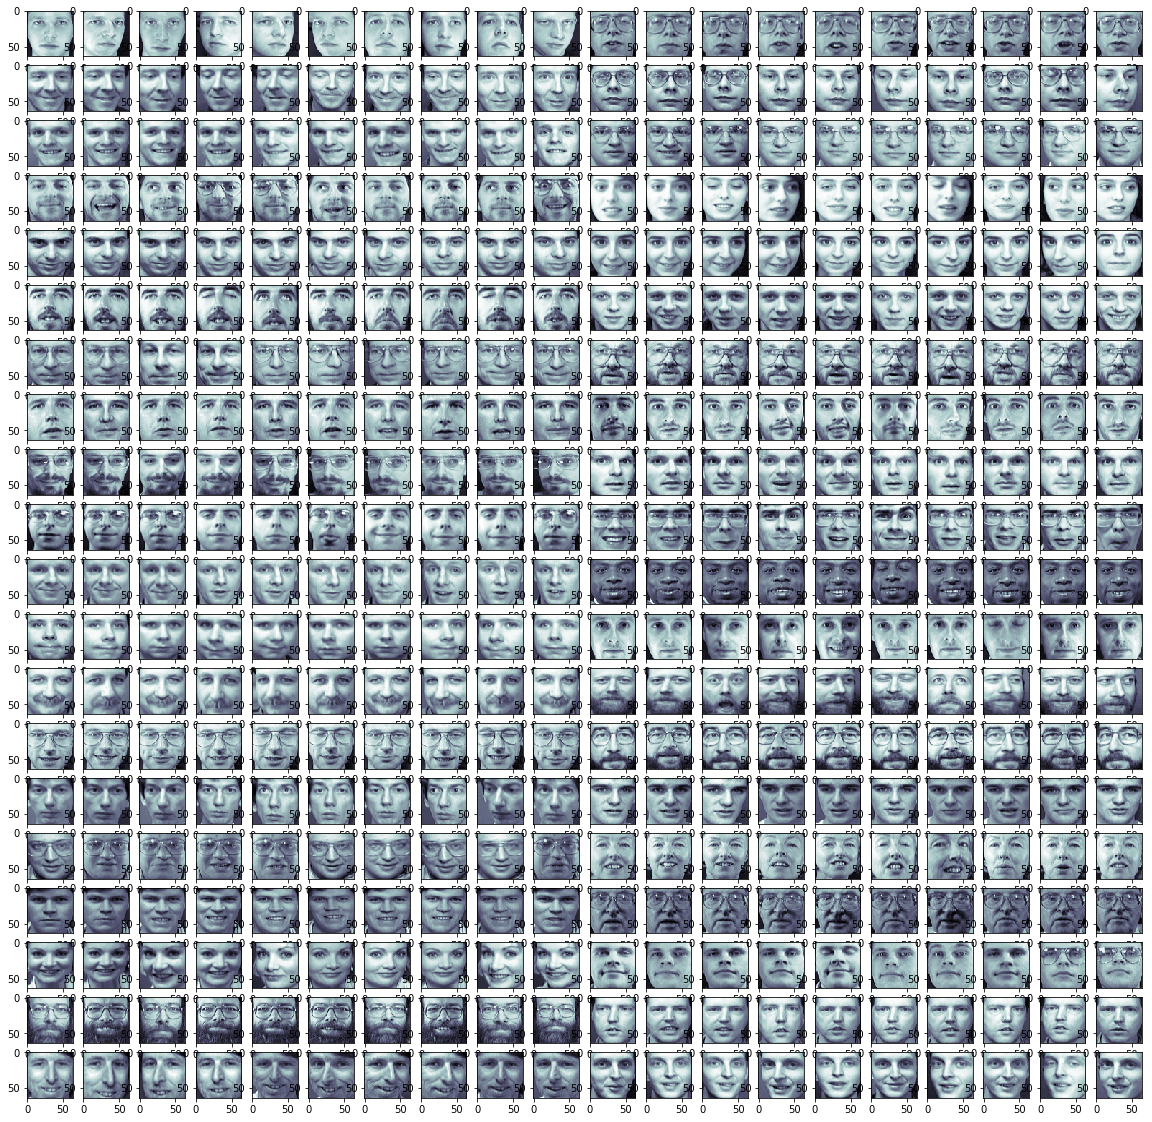

In [15]:
fig = plt.figure(figsize = (20,20))
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [16]:
X = oliv.data
Y = oliv.target

In [19]:
pca = PCA()
pca.fit(X)
pca.components_.shape

(400, 4096)

In [23]:
k = 0
current_sum = 0
total = sum(pca.explained_variance_)
while current_sum < 0.99:
    current_sum += pca.explained_variance_[k]/total
    k += 1
k

260

In [26]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(X)
transformed_data.shape

(400, 260)

In [27]:
X_approx = pca.inverse_transform(transformed_data)
X_approx.shape

(400, 4096)

In [28]:
X_approx_images = X_approx.reshape((400, 64, 64))

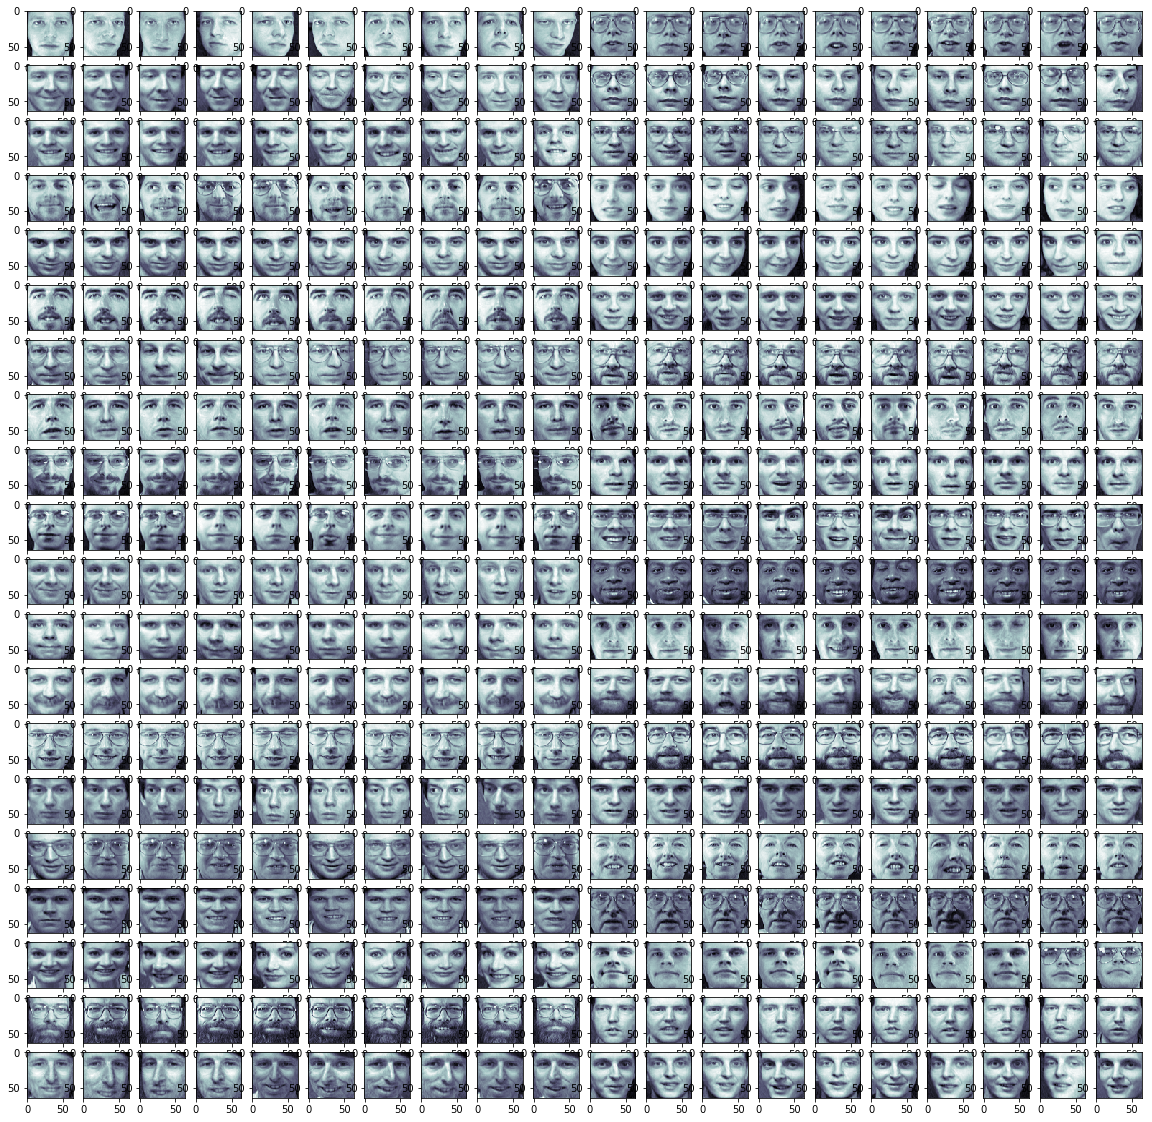

In [29]:
#Reproducing the images 
fig = plt.figure(figsize = (20,20))
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1)
    ax.imshow(X_approx_images[i], cmap = plt.cm.bone)
plt.show()

In [30]:
eigenv = pca.components_
eigenv.shape

(260, 4096)

In [31]:
eigenfaces = eigenv.reshape((260, 64, 64))

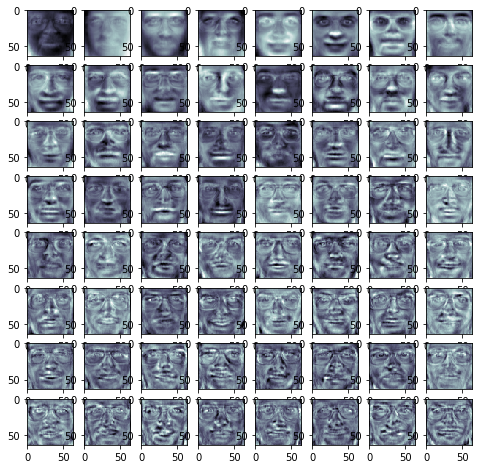

In [33]:
#Plotting the eigen_faces
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()